## Clustering Results Analysis

In [26]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('df_DBSCAN.csv', skipinitialspace=True, sep=',') 
# voi importate il vostro file, poi non dovete cambiare altro. il resto dell'analisi si adatta di conseguenza
# fatemi sapere se vi restituisce errore

In [28]:
df

,PurchDate,Model,SubModel,VehYear,RefId,IsBadBuy,Auction,VehicleAge,Make,Engine,...,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Doors,TotalPrice,CostOverOdo,labels_DBSCAN
0,2009-07-28,1500 RAM,EXT CAB,2001,61608,1,ADESA,8,DODGE,5.2L,...,23359,91752,CA,4315.0,0,1054,4D,5369.0,0.078288,0
1,2009-07-28,1500 RAM,EXT CAB,2001,61608,1,ADESA,8,DODGE,5.2L,...,23359,91752,CA,4315.0,0,1054,4D,5369.0,0.078288,0
2,2009-02-25,1500 RAM,MEGA CAB,2006,50261,0,MANHEIM,3,DODGE,5.7L,...,19662,78219,TX,10835.0,0,920,NaN,11755.0,0.148980,0
3,2009-01-12,1500 RAM,MEGA CAB,2006,33703,0,MANHEIM,3,DODGE,5.7L,...,19619,34761,FL,11515.0,0,983,NaN,12498.0,0.142777,0
4,2009-01-12,1500 RAM,MEGA CAB,2006,33703,0,MANHEIM,3,DODGE,5.7L,...,19619,34761,FL,11515.0,0,983,NaN,12498.0,0.142777,0
5,2010-12-08,1500 RAM,QUAD CAB,2002,23228,1,MANHEIM,8,DODGE,4.7L,...,18880,29532,SC,9110.0,0,1283,NaN,10393.0,0.103773,0
6,2009-07-31,1500 RAM,QUAD CAB,2002,60207,1,ADESA,7,DODGE,5.9L,...,18881,37771,TN,6455.0,0,1054,NaN,7509.0,0.110626,0
7,2009-05-28,1500 RAM,QUAD CAB,2002,22396,0,MANHEIM,7,DODGE,4.7L,...,17212,76040,TX,8985.0,0,1283,NaN,10268.0,0.103236,0
8,2009-06-25,1500 RAM,QUAD CAB,2002,71946,0,ADESA,7,DODGE,4.7L,...,3453,80817,CO,8100.0,0,1220,NaN,9320.0,0.109116,0
9,2009-07-10,1500 RAM,QUAD CAB,2002,36524,0,MANHEIM,7,DODGE,4.7L,...,20833,75236,TX,7785.0,0,1220,NaN,9005.0,0.097849,0


In [29]:
Labels = df.columns[-1]
Labels

'labels_DBSCAN'

In [30]:
df["PurchDate"].nunique()

515

In [31]:
df['PurchDate'] = pd.to_datetime(df['PurchDate']).dt.to_period('M')
df['PurchDate']

0       2009-07
1       2009-07
2       2009-02
3       2009-01
4       2009-01
5       2010-12
6       2009-07
7       2009-05
8       2009-06
9       2009-07
10      2009-03
11      2009-12
12      2009-01
13      2010-01
14      2009-01
15      2009-07
16      2009-04
17      2009-04
18      2010-04
19      2010-03
20      2010-12
21      2010-02
22      2010-03
23      2009-07
24      2010-06
25      2010-06
26      2009-10
27      2009-02
28      2010-03
29      2010-03
          ...  
50876   2009-01
50877   2009-09
50878   2009-03
50879   2009-09
50880   2009-02
50881   2010-08
50882   2010-08
50883   2009-02
50884   2010-08
50885   2010-08
50886   2009-07
50887   2010-07
50888   2009-12
50889   2010-01
50890   2009-01
50891   2009-03
50892   2009-12
50893   2009-01
50894   2010-02
50895   2010-11
50896   2010-10
50897   2010-10
50898   2010-11
50899   2010-02
50900   2009-03
50901   2009-03
50902   2009-04
50903   2010-09
50904   2010-07
50905   2010-10
Name: PurchDate, Length:

In [32]:
df["PurchDate"].nunique()

24

In [33]:
categorical_columns = list()

for col in df.columns:
    if df[col].nunique() < 50:
        print('Numero di valori unici della variabile ' + str(col) + ':', str(df[col].nunique()))
        categorical_columns.append(col)
        
categorical_columns.remove(Labels)
categorical_columns.remove('VehYear')
categorical_columns

Numero di valori unici della variabile PurchDate: 24
Numero di valori unici della variabile SubModel: 38
Numero di valori unici della variabile VehYear: 10
Numero di valori unici della variabile IsBadBuy: 2
Numero di valori unici della variabile Auction: 3
Numero di valori unici della variabile VehicleAge: 10
Numero di valori unici della variabile Make: 32
Numero di valori unici della variabile Transmission: 2
Numero di valori unici della variabile WheelTypeID: 3
Numero di valori unici della variabile Nationality: 2
Numero di valori unici della variabile Size: 12
Numero di valori unici della variabile TopThreeAmericanName: 4
Numero di valori unici della variabile VNST: 37
Numero di valori unici della variabile IsOnlineSale: 2
Numero di valori unici della variabile Doors: 4
Numero di valori unici della variabile labels_DBSCAN: 2


['PurchDate',
 'SubModel',
 'IsBadBuy',
 'Auction',
 'VehicleAge',
 'Make',
 'Transmission',
 'WheelTypeID',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'VNST',
 'IsOnlineSale',
 'Doors']

** Cluster degi Outlier **

In [35]:
df.loc[df['labels_DBSCAN'] == -1]

,PurchDate,Model,SubModel,VehYear,RefId,IsBadBuy,Auction,VehicleAge,Make,Engine,...,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Doors,TotalPrice,CostOverOdo,labels_DBSCAN
1199,2010-08,1500 SILVERADO,REG CAB,2004,21427,0,OTHER,6,CHEVROLET,4.3L,...,99750,95673,CA,8000.00,0,822,NaN,8822.00,0.462936,-1
1200,2010-08,1500 SILVERADO,REG CAB,2004,21451,0,OTHER,6,CHEVROLET,4.3L,...,99750,95673,CA,8200.00,0,822,NaN,9022.00,0.523794,-1
1711,2010-11,4 RUNNER,UTILITY SPORT,2006,68040,1,ADESA,4,TOYOTA,NaN,...,17675,28273,NC,18245.00,0,482,4D,18727.00,0.378135,-1
1712,2009-09,4 RUNNER,UTILITY SPORT,2008,55914,1,OTHER,1,TOYOTA,NaN,...,99761,85284,AZ,15299.88,0,522,4D,15821.88,0.614996,-1
2142,2010-09,ACCORD,SEDAN,2006,35206,1,MANHEIM,4,HONDA,4C,...,19619,34761,FL,12590.00,0,462,4D,13052.00,0.483116,-1
2154,2009-03,ACCORD,SEDAN,2007,59252,0,MANHEIM,2,HONDA,NaN,...,16926,92337,CA,16345.00,0,762,4D,17107.00,0.450375,-1
3095,2009-02,ARMADA,UTILITY SPORT,2006,57269,1,MANHEIM,3,NISSAN,V8,...,16926,92057,CA,8089.86,0,822,4D,8911.86,0.220715,-1
11633,2010-06,DURANGO,SUV,2006,18017,0,OTHER,4,DODGE,V8,...,1235,84104,UT,10375.00,1,882,4D,11257.00,0.406385,-1
14655,2009-09,F150,CREW CAB,2007,20879,1,MANHEIM,2,FORD,V8,...,19064,75236,TX,12812.00,0,1313,NaN,14125.00,0.208031,-1
14659,2010-09,F150,CREW CAB,2009,38268,1,MANHEIM,1,FORD,V8,...,8655,75236,TX,32300.00,0,941,NaN,33241.00,3.419437,-1


In [39]:
nBadBuy = len(df.loc[df['IsBadBuy'] == 1])
nBadBuy

6410

In [41]:
(nBadBuy/len(df))*100

12.591835932895926

In [47]:
(len(df.loc[df['labels_DBSCAN'] == -1].loc[df['IsBadBuy'] == 1])/len(df.loc[df['labels_DBSCAN'] == -1]))*100

51.78571428571429

** CrossTab di ciascun attributo categorico **




Absolute Crosstab: 
 labels_DBSCAN  -1     0
PurchDate              
2009-01         0  1866
2009-02         6  2175
2009-03         2  2099
2009-04         2  2503
2009-05         5  2063
2009-06         4  1742
2009-07         4  2253
2009-08         5  2392
2009-09         4  2283
2009-10         1  2638
2009-11         1  1793
2009-12         4  1628
2010-01         1  2256
2010-02         1  2212
2010-03         0  2017
2010-04         1  2066
2010-05         3  1917
2010-06         2  2144
2010-07         1  2282
2010-08         2  1877
2010-09         4  2319
2010-10         1  2427
2010-11         2  2185
2010-12         0  1713


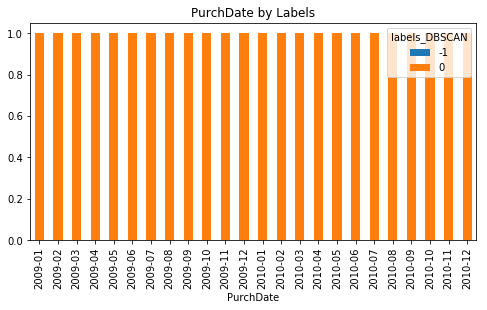




Absolute Crosstab: 
 labels_DBSCAN        -1      0
SubModel                      
ACCESS CAB            0      3
BASE                  0      1
CARGO                 0      1
CARGO EXT             0      2
CONVERTIBLE           0    358
CONVERTIBLE HARDTOP   0      2
CONVERTIBLE SUV       0      2
COUPE                 0   1902
COUPE QUAD            0    110
CREW CAB              5    320
CROSSOVER             0     43
CUV                   1   1233
DOUBLE CAB            1     11
EXT CAB               0    898
HARDTOP               0      4
HATCHBACK             0    185
JEEP                  0      6
LIFTBACK              0      6
MAZDA3                0     17
MAZDA5                0      5
MEGA CAB              0      3
MINIVAN               0   1820
MINIVAN EXT           1    171
PASSENGER             1    899
PASSENGER EXT        10    675
QUAD CAB              0    688
REG CAB               2    782
ROADSTER              1      1
SEDAN                18  29892
SPORT          

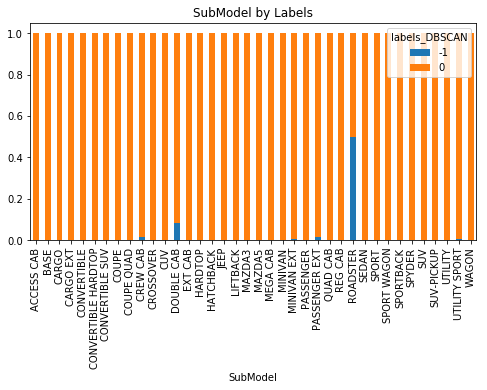




Absolute Crosstab: 
 labels_DBSCAN  -1      0
IsBadBuy                
0              27  44469
1              29   6381


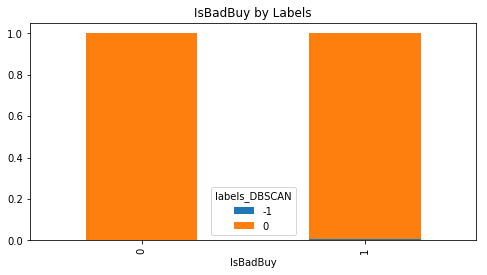




Absolute Crosstab: 
 labels_DBSCAN  -1      0
Auction                 
ADESA          14  10165
MANHEIM        33  28229
OTHER           9  12456


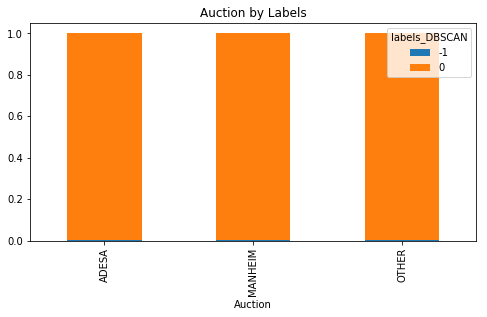




Absolute Crosstab: 
 labels_DBSCAN  -1      0
VehicleAge              
0               0      1
1               9   2322
2              11   6114
3              13  10895
4               8  11549
5               8   8807
6               4   5658
7               3   3415
8               0   1613
9               0    476


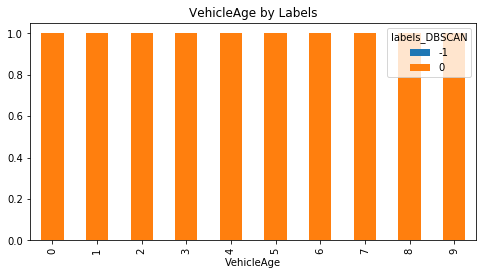




Absolute Crosstab: 
 labels_DBSCAN  -1      0
Make                    
ACURA           0     25
BUICK           2    547
CADILLAC        0     25
CHEVROLET      14  11974
CHRYSLER        3   6340
DODGE           1   8204
FORD            4   7631
GMC             0    457
HONDA           2    374
HUMMER          0      1
HYUNDAI         0   1394
INFINITI        5     31
ISUZU           0    103
JEEP            0   1081
KIA             1   1850
LEXUS           7     20
LINCOLN         0     79
MAZDA           0    747
MERCURY         0    699
MINI            0     17
MITSUBISHI      0    786
NISSAN          4   1587
OLDSMOBILE      0    187
PLYMOUTH        0      1
PONTIAC         3   2954
SATURN          1   1599
SCION           0    103
SUBARU          0     21
SUZUKI          2   1041
TOYOTA          6    843
VOLKSWAGEN      1     99
VOLVO           0     30


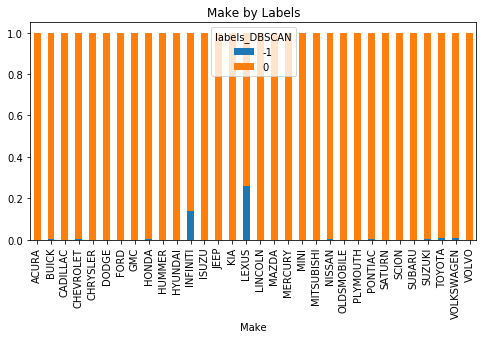




Absolute Crosstab: 
 labels_DBSCAN  -1      0
Transmission            
AUTO           55  48944
MANUAL          1   1906


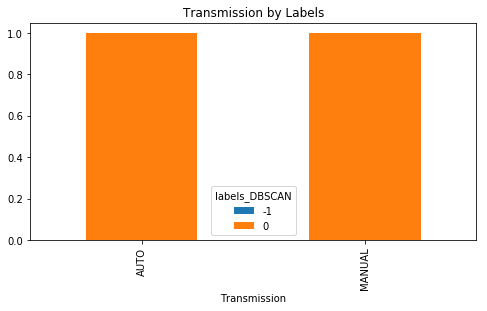




Absolute Crosstab: 
 labels_DBSCAN  -1      0
WheelTypeID             
1.0            47  27009
2.0             9  23306
3.0             0    535


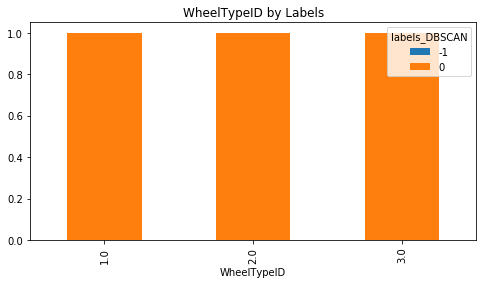




Absolute Crosstab: 
 labels_DBSCAN  -1      0
Nationality             
AMERICAN       28  41779
NOT AMERICAN   28   9071


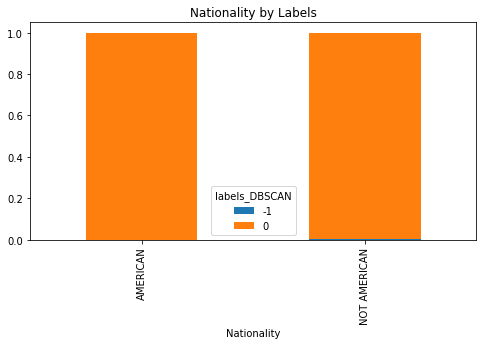




Absolute Crosstab: 
 labels_DBSCAN  -1      0
Size                    
COMPACT         1   5540
CROSSOVER       0   1188
LARGE           0   6184
LARGE SUV       1    999
LARGE TRUCK     8   2164
MEDIUM         11  21567
MEDIUM SUV     12   5225
SMALL SUV       0   1571
SMALL TRUCK     0    645
SPECIALTY       9   1388
SPORTS          1    612
VAN            13   3767


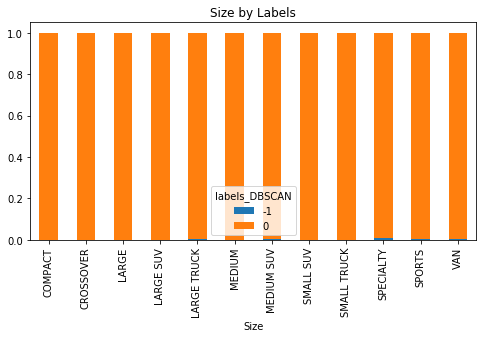




Absolute Crosstab: 
 labels_DBSCAN         -1      0
TopThreeAmericanName           
CHRYSLER               4  15624
FORD                   4   8409
GM                    20  17746
OTHER                 28   9071


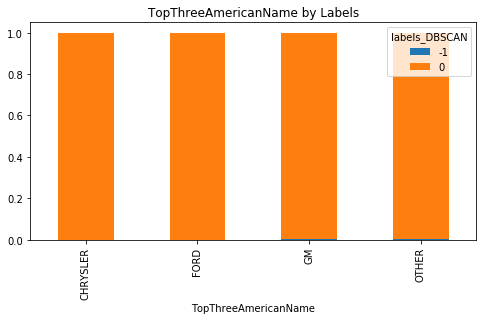




Absolute Crosstab: 
 labels_DBSCAN  -1     0
VNST                   
AL              0   471
AR              0    40
AZ              7  4340
CA             14  5018
CO              4  3533
FL              7  7111
GA              3  1768
IA              0   359
ID              0   116
IL              0   307
IN              0   324
KY              0   164
LA              0   241
MA              0     8
MD              0   739
MI              0     7
MN              0    44
MO              0   473
MS              0   351
NC              5  4981
NE              0    13
NH              0    77
NJ              0   218
NM              0   197
NV              1   392
NY              0     3
OH              0   537
OK              0  2758
OR              0   142
PA              0   513
SC              0  2957
TN              1  1250
TX             10  9330
UT              1   625
VA              3  1164
WA              0    83
WV              0   196


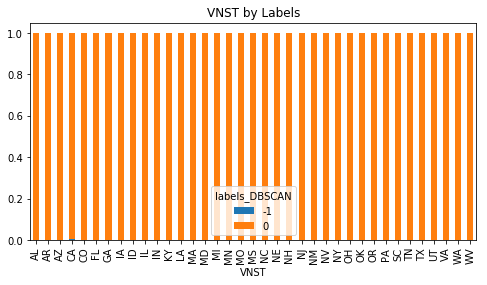




Absolute Crosstab: 
 labels_DBSCAN  -1      0
IsOnlineSale            
0              55  49547
1               1   1303


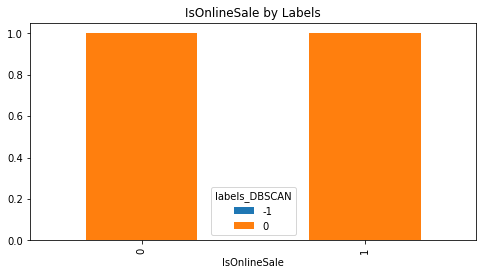




Absolute Crosstab: 
 labels_DBSCAN  -1      0
Doors                   
2D              1   2539
3D              0     40
4D             36  41832
5D              0     62


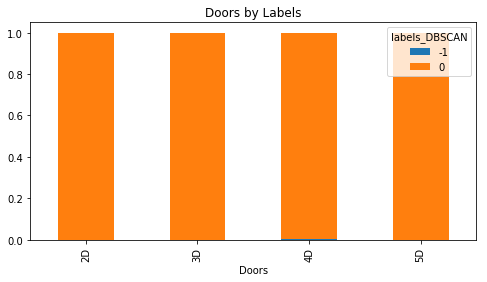

In [9]:
for col in df[categorical_columns]:
    
    absCrosstabClusters = pd.crosstab(df[col], df[Labels])
    relCrosstabClusters = absCrosstabClusters.div(absCrosstabClusters.sum(1).astype(float), axis=0)
    
    print('\n\n\nAbsolute Crosstab: \n', absCrosstabClusters)
    relCrosstabClusters.plot(kind='bar', stacked=True, title= col + ' by Labels', figsize=(8,4))
    plt.xlabel(col)
    plt.show()

** Visualizzazione dei Cluster in due dimensioni **

In [10]:
numerical_columns = ['VehOdo', 'VehBCost', 'MMRAcquisitionAuctionAveragePrice', 'VehicleAge', 'CostOverOdo', 'WarrantyCost']

In [11]:
from itertools import combinations as comb

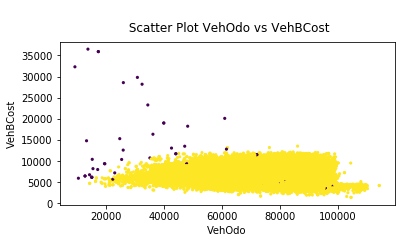

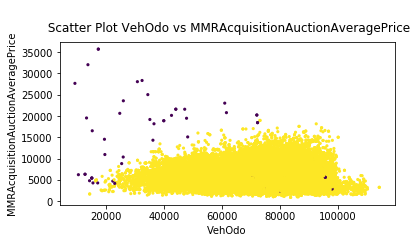

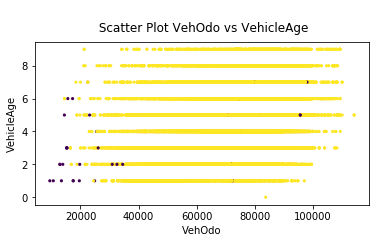

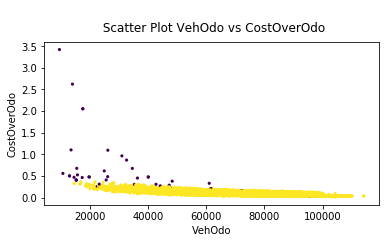

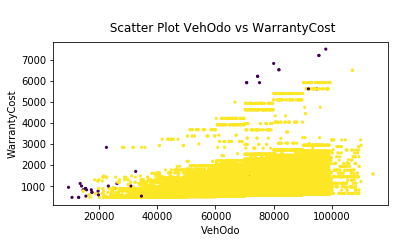

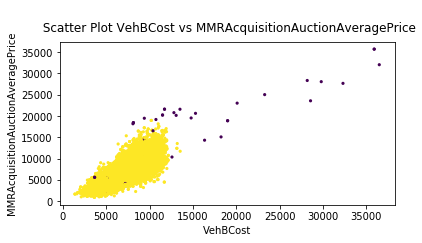

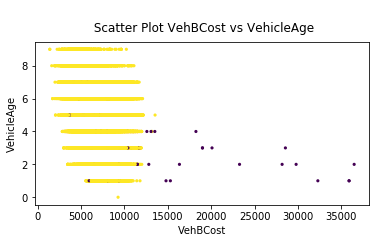

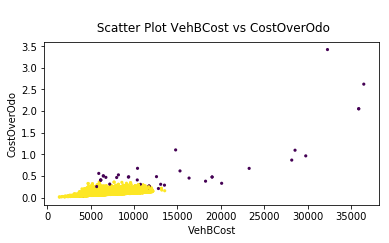

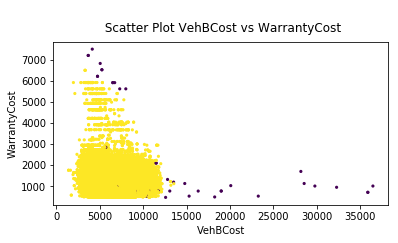

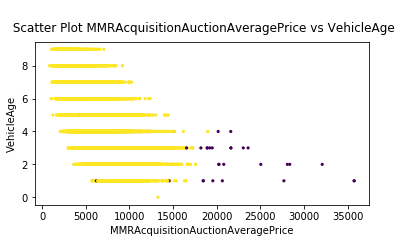

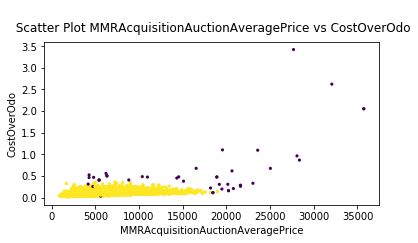

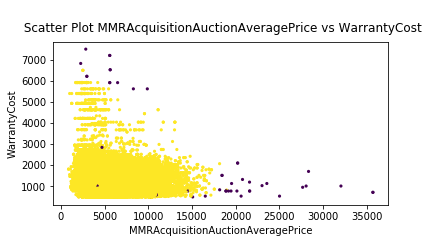

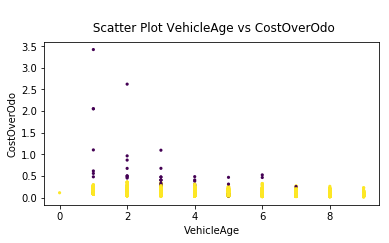

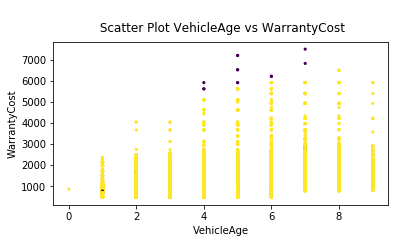

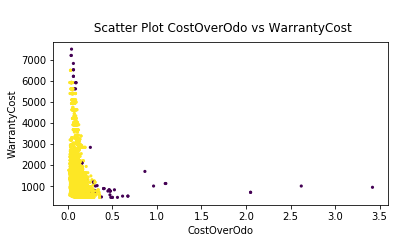

In [25]:
for col in list(comb(numerical_columns,2)):
    
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.scatter(df[col[0]], df[col[1]], c = df[Labels], s=10, edgecolor='')
    plt.title('\n Scatter Plot ' + str(col[0]) + ' vs ' + str(col[1]), pad=10)
    plt.xlabel(str(col[0]))
    plt.ylabel(str(col[1]))
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show()